# Sample data from the Choroid plexus
This is a notebook describing analysis of a single cell dataset (10X, droplet-based) from the [Choroid plexus](https://en.wikipedia.org/wiki/Choroid_plexus) of Mus musculus ([Van Hove et al. 2019 Nature Neuroscience](https://www.ncbi.nlm.nih.gov/pubmed/31061494)). The original data were retrieved from [GEO (GSM3687214)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3687214), and the data have been included the the default adobo installation. The dataset mainly consists of macrophages.

First we need to load the Python package:

In [1]:
import adobo as ad

adobo version 0.2.46. Documentation: https://oscar-franzen.github.io/adobo/


### Load the gene expression data
The parameter `bundled=True` makes adobo aware that this dataset is example data and the user does not need to worry about paths. The `desc` parameter can be used to set a description of the dataset, it can be a long description or a short mnemonic. The `verbose=True` can be omitted, but instructs adobo to be more talkative. The `output_file` is a parameter we can use to set a filename where the object is saved by default. If `output_file` is set, then we can at anytime call the object function `save` to save the entire object to this file.

In [2]:
exp = ad.IO.load_from_file('GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz',
                           output_file='GSM3687214.joblib',
                           desc='Sample data (GSM3687214; Choroid plexus)',
                           bundled=True,
                           verbose=True)
# save the entire data object to "GSM3687214.joblib"
# exp.save()

Using a sparse matrix structure, please wait
Generating cell summary statistics...
Memory usage of loaded data: 83.51 MB
27,998 genes and 4,055 cells were loaded
loading took 0.2 minutes


***
It's always a good idea to quickly inspect that the data were loaded properly.

In [3]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 27,998x4,055)

Commands executed:

Normalizations available:

norm_data structure:


***
The data matrix consists of 27,998 genes and 4,055 cells. Let's also inspect the raw read counts:

In [4]:
exp.count_data

,AAACCTGAGAAGGTGA,AAACCTGAGCCAGTTT,AAACCTGAGTGTTGAA,AAACCTGCAATCTACG,AAACCTGCACGCGAAA,AAACCTGGTAAATACG,AAACCTGGTCTAGAGG,AAACCTGGTCTGCAAT,AAACCTGGTTATCACG,AAACCTGGTTCACCTC,...,TTTGTCAAGGCATGGT,TTTGTCAAGTATTGGA,TTTGTCAAGTGACTCT,TTTGTCACAGACGCAA,TTTGTCAGTACCGTAT,TTTGTCAGTCTTCAAG,TTTGTCATCGCCGTGA,TTTGTCATCGCGTTTC,TTTGTCATCTCCGGTT,TTTGTCATCTTGAGGT
C0,,,,,,,,,,,,,,,,,,,,,
Xkr4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm37381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PISD,1,1,0,2,0,1,0,0,0,0,...,0,0,1,6,3,0,1,1,1,1
DHRSX,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


***
`count_data` is a [Pandas](https://pandas.pydata.org/) data frame. By default the data frame is sparse.

### Generate summary plots and identify quality thresholds

Using these plots we can identify outlier cells and identify thresholds for removing uninformative genes. A good start is to plot the total read counts per cell.

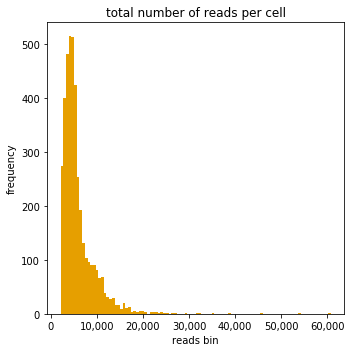

In [5]:
ad.plotting.overall(exp)

***
From the above histogram we can see that a few cells have excessive read counts. Let's count the the numbers of cells with at least 20,000 reads per cell:

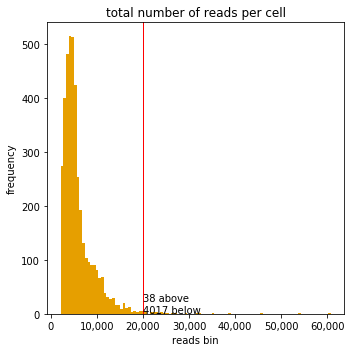

In [6]:
ad.plotting.overall(exp, cut_off=20000)

***
We can see that 38 cells are above the cut off, and we can decide to remove them later. But let's first explore how many genes are expressed per cell:

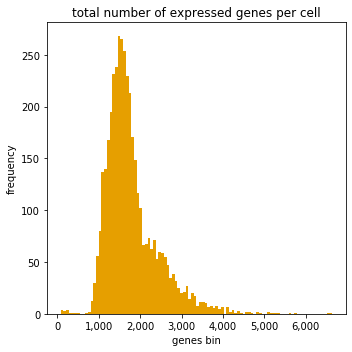

In [7]:
ad.plotting.overall(exp, what='genes')

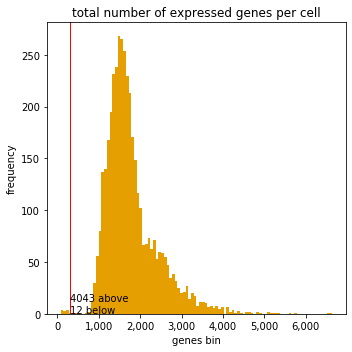

In [8]:
ad.plotting.overall(exp, what='genes', cut_off=300)

We can also relate the total read depth with the number of expressed genes in a scatter plot.

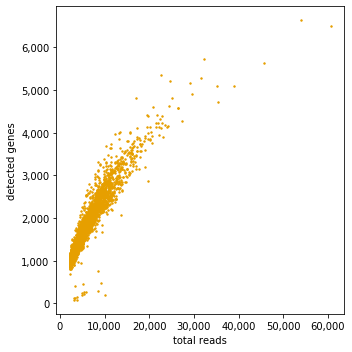

In [9]:
ad.plotting.overall_scatter(exp)

### Apply quality filters

The below command will filter the data to contain only cells with at least 1000 reads and not more than 20,000 reads.

In [6]:
ad.preproc.simple_filter(exp,
                         what='cells',
                         minreads=1000,
                         maxreads=20000)

38

In [7]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 27,998x4,017)

Commands executed:

Normalizations available:

norm_data structure:


***
It is also a good idea to remove uninformative genes. To do so we call the same function but set `what='genes'`.

In [8]:
ad.preproc.simple_filter(exp,
                         what='genes',
                         min_exp=0.01)

10816

In [9]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 17,182x4,017)

Commands executed:

Normalizations available:

norm_data structure:


***
We can rerun `simple_filter` at any time to adjust the thresholds. Typing the name of the object, `exp`, gives information about the dimensions of the filtered data (17,182 genes and 4017 cells). We can now call `overall_scatter` again, and removed cells will be colored in red (if we are still not satisfied, we can go back and adjust the thresholds for `simple_filter`):

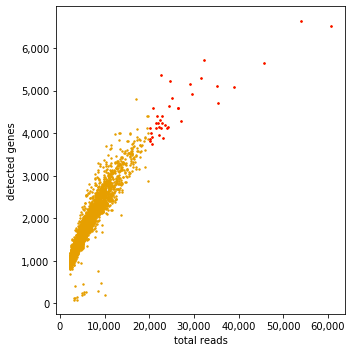

In [10]:
ad.plotting.overall_scatter(exp)

### Removing mitochondrial (MT) genes
Sometimes it's preferred to remove MT genes to avoid that cell clustering is influenced or driven by them. A single command will identify MT genes (assuming they have an annotation starting with `mt-`:

In [11]:
ad.preproc.find_mitochondrial_genes(exp, mito_pattern='^mt-')

13

The output indicates the number of MT genes found.

### Normalization

adobo supports 5 normalization procedures. We will here apply standard normalization. See help pages for the complete set of availalble normalization procedures.

In [12]:
ad.normalize.norm(exp, method='fqn')

If you run out of memory (running `fqn` can be memory hungry), it is also fine to run a standard normalization (don't forget to remove the comment character):

In [7]:
# ad.normalize.norm(exp, method='standard')

Running the above command will not generate any output as default. The normalized data is present inside the `exp.norm_data` nested dictionary. By typing exp we can see the structure of it:

In [13]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 17,182x4,017)

Commands executed:
find_mitochondrial_genes
norm (fqn)

Normalizations available:
fqn

norm_data structure:
fqn
	data
	method
	log
	norm_ercc
	dr
	clusters
	slingshot
	de

***
If we want to examine the normalized data structure, we can easily accomplish it by accessing:

In [14]:
exp.norm_data['fqn']['data']

,AAACCTGAGAAGGTGA,AAACCTGAGCCAGTTT,AAACCTGAGTGTTGAA,AAACCTGCAATCTACG,AAACCTGCACGCGAAA,AAACCTGGTAAATACG,AAACCTGGTCTAGAGG,AAACCTGGTCTGCAAT,AAACCTGGTTATCACG,AAACCTGGTTCACCTC,...,TTTGTCAAGGCATGGT,TTTGTCAAGTATTGGA,TTTGTCAAGTGACTCT,TTTGTCACAGACGCAA,TTTGTCAGTACCGTAT,TTTGTCAGTCTTCAAG,TTTGTCATCGCCGTGA,TTTGTCATCGCGTTTC,TTTGTCATCTCCGGTT,TTTGTCATCTTGAGGT
C0,,,,,,,,,,,,,,,,,,,,,
Sox17,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mrpl15,0.905957,0.000000,0.0,0.000000,0.000359,0.000000,0.000000,0.757081,0.000000,0.0,...,0.000000,1.153349,0.577641,0.497739,0.000000,0.000000,0.508130,0.820888,0.000000,0.000000
Lypla1,0.000000,0.000000,0.0,0.000000,0.000359,0.000000,1.002691,0.000000,0.000000,0.0,...,0.387572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821497,0.000000,0.626150
Gm37988,0.000000,0.000000,0.0,0.000000,0.000359,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tcea1,0.000000,0.430310,0.0,0.000000,1.166849,0.000000,1.294591,0.000000,0.000000,0.0,...,0.000000,0.000000,0.605054,0.503577,0.000000,0.000000,0.502057,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC168977.1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.461422,0.000000,0.000000,0.000000,0.000000,0.000000
PISD,0.901926,0.437223,0.0,1.103576,0.000000,0.507625,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.579084,2.916936,1.851863,0.000000,0.509644,0.820684,0.333019,0.637045


### Discover variable genes

Most downstream visualization algorithms like clustering perform better when applied on a subset of genes. The below command will identify 1000 variable genes using the method introduced in the Seurat R package:

In [15]:
ad.hvg.find_hvg(exp, method='brennecke', ngenes=1000)

The identified genes can be extracted. To print the first ten:

In [17]:
exp.norm_data['fqn']['hvg']['genes'][0:10]

array(['Pcmtd1', 'Sema3b', 'Slc38a3', 'Sema3f', 'Gm20661', 'Ccdc36',
       'Klhdc8b', 'Lamb2', 'P4htm', 'Slc25a20'], dtype=object)

### Principal component analysis

Generate 50 PCA components from the data

In [18]:
ad.dr.pca(exp, ncomp=50, verbose=True)

Running PCA (method=irlb) on the fqn normalization (dimensions 1000 genes x 4017 cells)
saving 50 components


***
As you see from the above output, PCA was run on the highly variable gene-subset of the data (1000 genes). But is 50 principal components too many or too few? One way to find out is to perform a jackstraw analysis, similar to Seurat's function for this, it can be done in adobo as well. `jackstraw` permutates a subset of the data and tests for the enrichment of significant genes in each principal component.

In [19]:
ad.dr.jackstraw(exp, retx=False)

The above command will run for a couple of minutes. After it has finished we can examine the results from the jackstraw analysis to see how many components we should include:

In [20]:
exp.norm_data['fqn']['dr']['jackstraw']['results_by_comp']

,PC,chi2_p,chi2_p_adj,significant
0,PC0,5.236393e-48,6.545491e-47,True
1,PC1,1.140350e-58,2.850876e-57,True
2,PC2,2.510365e-66,1.255182e-64,True
3,PC3,3.968558e-13,2.480349e-12,True
4,PC4,4.626549e-14,3.304678e-13,True
5,PC5,3.799627e-41,3.799627e-40,True
6,PC6,3.706923e-50,6.178206e-49,True
7,PC7,3.271523e-29,2.726270e-28,True
8,PC8,1.331998e-04,3.329996e-04,True
9,PC9,6.803323e-07,3.401661e-06,True


From the above table we can see that after component 30, fewer components become significant. So let's stay use PCs 1-30 in our analyses:

In [21]:
ad.dr.pca(exp, ncomp=30, verbose=True)

Running PCA (method=irlb) on the fqn normalization (dimensions 1000 genes x 4017 cells)
saving 30 components


In [22]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 17,182x4,017)

Commands executed:
find_mitochondrial_genes
norm (fqn)
find_hvg (brennecke)
pca (irlb)

Normalizations available:
fqn

norm_data structure:
fqn
	data
	method
	log
	norm_ercc
	dr
		pca
			comp
			contr
			method
	clusters
	slingshot
	de
	hvg
		genes
		method

Another approach to determining the number of principal components to include is to generate an elbow plot (although the jackstraw approach is likely more powerful).

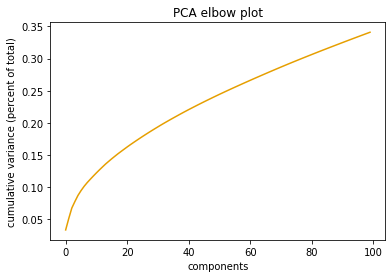

In [23]:
ad.plotting.pca_elbow(exp)

If we choose 30 components we can see from the plot that this would account for approx 20% of the variance. It might be a good idea to examine the gene loadings of each component, a task helpful in identifying important genes:

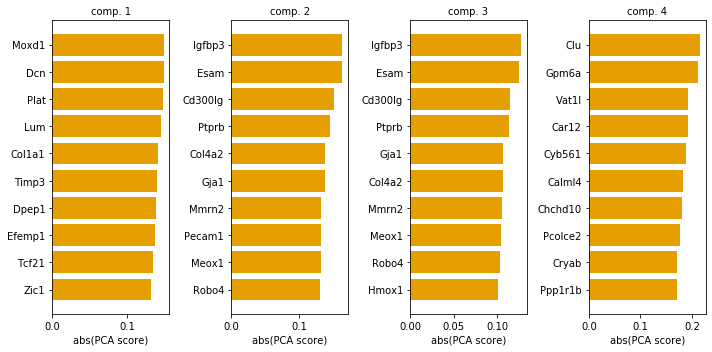

In [30]:
ad.plotting.pca_contributors(exp, fontsize=10, dim=4)

### Generate cell clusters

One of the key goals in single cell analysis is to reduce a large number of cells to a smaller number of cell clusters, to make analysis easier and interpretable. adobo supports a number of different clustering algorithms. Here we will use the Leiden algorithm, which typically yields good results:

In [31]:
ad.clustering.generate(exp, clust_alg='leiden', verbose=True)

Running clustering on the fqn normalization
64.29% (n=290,210) of links pruned
cluster cells
0 877
1 836
2 502
3 441
4 313
5 136
6 120
7 101
8 92
9 88
10 86
11 80
12 68
13 36
14 35
15 33
16 24
17 21
18 19
19 19
20 16
21 15
22 11
23 8
24 7
25 7
26 6
27 5
28 4
29 2
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1


By default, adobo prints the sizes of the identified cell clusters. This behavior can be suppressed by instead setting `verbose=False`.

### 2d visualization

Visualization using methods like t-SNE and UMAP are supported. First generate the corresponding embedding:

In [32]:
ad.dr.umap(exp, verbose=True)

Running UMAP on the fqn normalization
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Wed Nov 27 11:28:13 2019 Finding Nearest Neighbors
Wed Nov 27 11:28:14 2019 Finished Nearest Neighbor Search
Wed Nov 27 11:28:16 2019 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	comp

In [33]:
ad.dr.tsne(exp, verbose=True)

Running tSNE (perplexity 30) on the fqn normalization
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4017 samples in 0.015s...
[t-SNE] Computed neighbors for 4017 samples in 0.830s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4017
[t-SNE] Computed conditional probabilities for sample 2000 / 4017
[t-SNE] Computed conditional probabilities for sample 3000 / 4017
[t-SNE] Computed conditional probabilities for sample 4000 / 4017
[t-SNE] Computed conditional probabilities for sample 4017 / 4017
[t-SNE] Mean sigma: 1.127216
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.688164
[t-SNE] KL divergence after 2000 iterations: 1.604119


***
And now visualize:

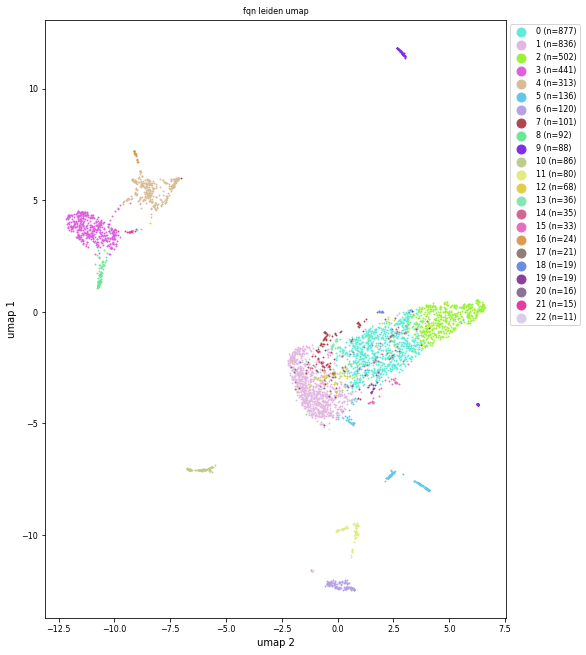

In [34]:
ad.plotting.cell_viz(exp, reduction='umap')

With t-SNE:

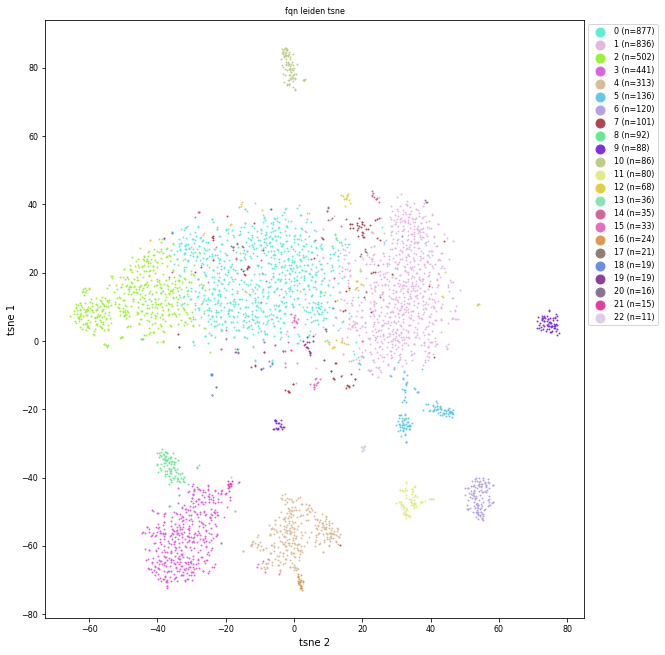

In [35]:
ad.plotting.cell_viz(exp, reduction='tsne')

### Predict cell types

Cell type prediction using collections of marker genes is one way to spark ideas.

In [36]:
ad.bio.cell_type_predict(exp)

Now we can take a look at the predictions (in the Python console, you can click on each cell cluster to see its annotation):

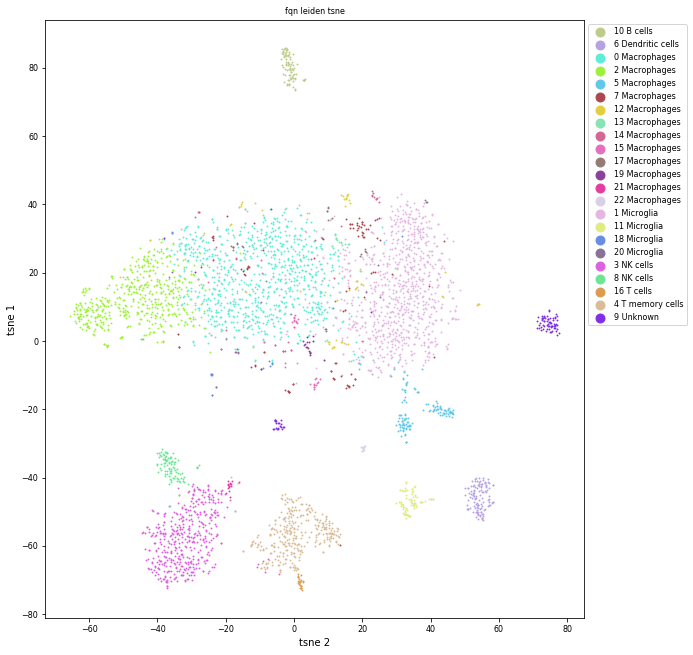

In [37]:
ad.plotting.cell_viz(exp, reduction='tsne', cell_types=True)

From the above scatter plot we see the large clusters in the center are macrophages.

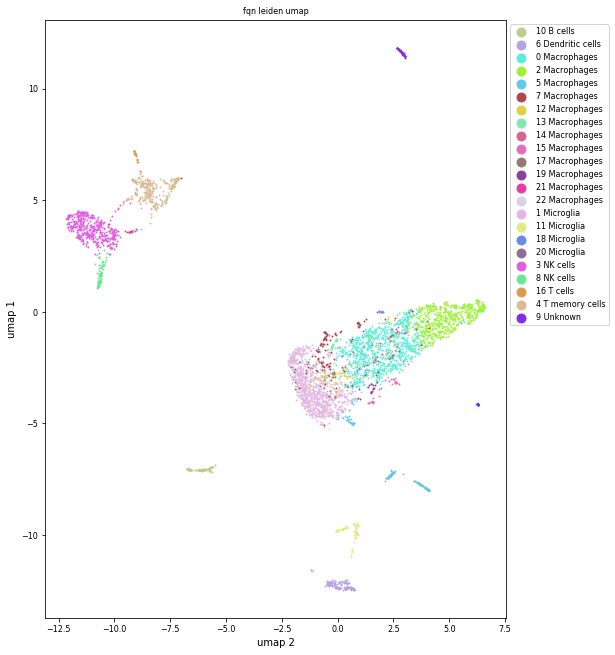

In [38]:
ad.plotting.cell_viz(exp, reduction='umap', cell_types=True)

### What are the genes expressed in cluster 0?

Cluster 0 appears to be a macrophage cluster. We can start by revisiting the function `adobo.plotting.pca_contributors`. This time we add the parameter `cluster=0`, to indicate we want to generate a PCA decomposition of cluster 0.

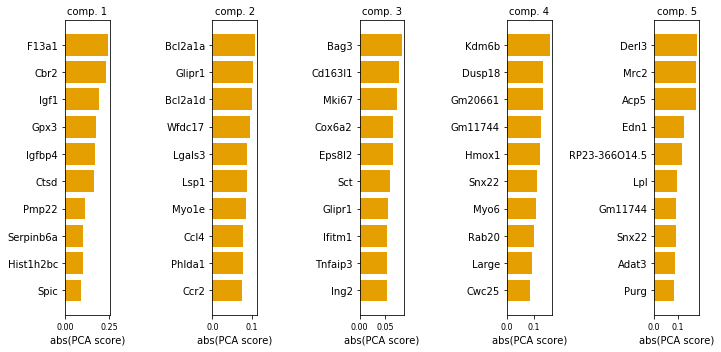

In [40]:
ad.plotting.pca_contributors(exp, fontsize=10, cluster=0)

From these plot of PCA loadings we see an enrichment of genes known to be expressed in macrophages. We can confirm expression in cluster 0 by adding the gene of interest in the `genes` parameter of the `adobo.plotting.cell_viz` function. Here is *Mafb*, part of [a known macrophage gene signature](https://www.jimmunol.org/content/198/5/2070):

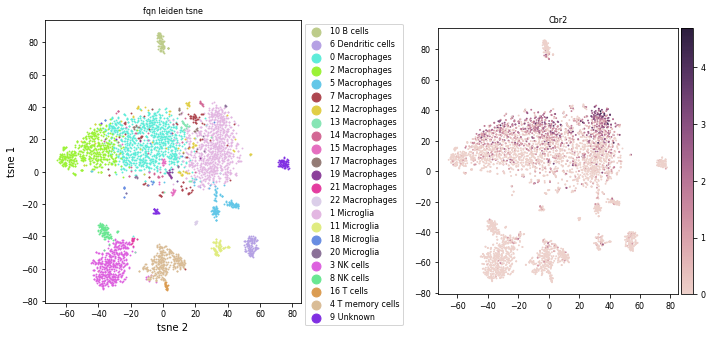

In [41]:
ad.plotting.cell_viz(exp, reduction='tsne', cell_types=True, genes='Cbr2')

We can generate violin charts of the top 10 genes expressed in cluster 0:

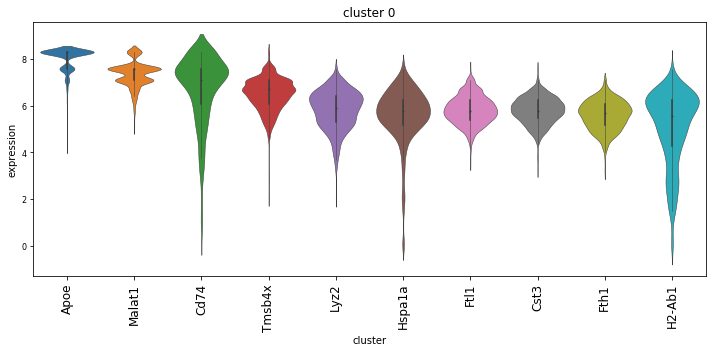

In [43]:
ad.plotting.genes_violin(exp, cluster=0, fontsize=12)

We can also examine the expression of *Cbr2* across all clusters:

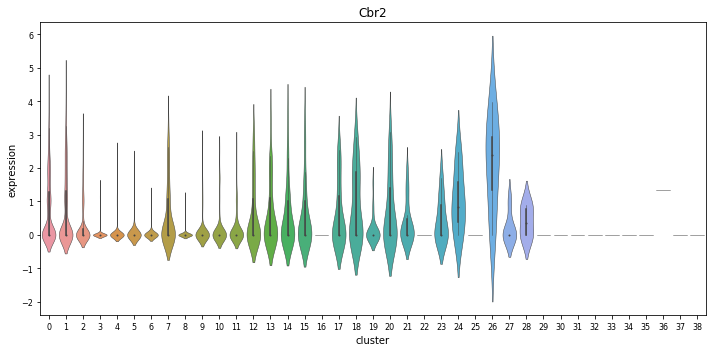

In [44]:
ad.plotting.genes_violin(exp, gene='Cbr2')

Set `violin=False` to use a box plot instead:

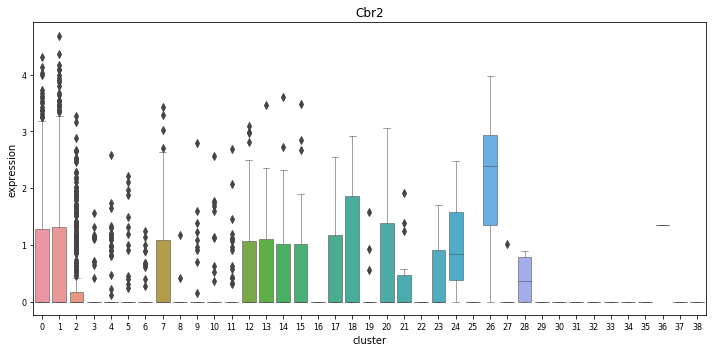

In [45]:
ad.plotting.genes_violin(exp, gene='Cbr2', violin=False)

### Meta data

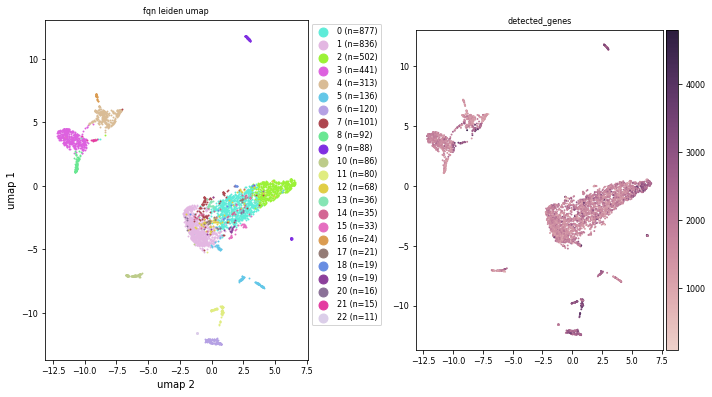

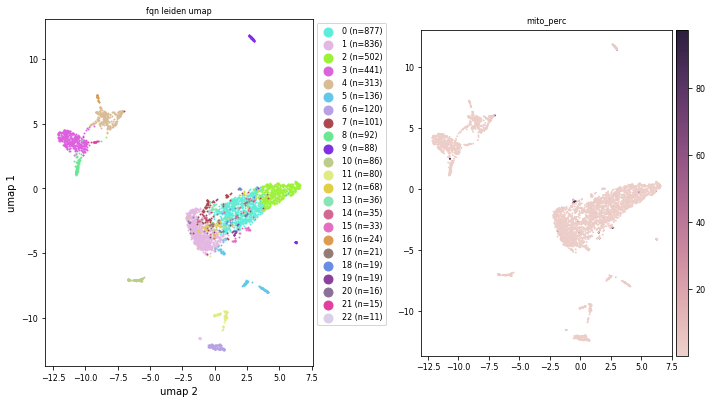

In [47]:
ad.plotting.cell_viz(exp, reduction='umap', metadata='detected_genes')
ad.plotting.cell_viz(exp, reduction='umap', metadata='mito_perc')

In [48]:
exp.save()